In [4]:
import pandas as pd
data1 = {'age':['<=30','=30','31..40','>40','>40','>40','31..40','<=30','<=30','>40','<=30','31..40','31..40','>40'],
        'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
        'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
        'credit_rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
        'buys_computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']}
df = pd.DataFrame(data1)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [26]:
import math
def entropy(class_column):
    entropy = 0
    total_count = len(class_column)
    unique_values = class_column.unique()
    
    for value in unique_values:
        probability = (class_column == value).sum() / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

target_entropy = entropy(df['buys_computer'])
target_entropy

0.9402859586706311

In [27]:
def information_gain(data, feature, target_feature):
    feature_values = data[feature].unique()
    total_entropy = entropy(data[target_feature])
    
    for value in feature_values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target_feature])
        total_entropy -= (len(subset) / len(data)) * subset_entropy
    
    return total_entropy

feature_columns = ['age','income','student','credit_rating','buys_computer']
information_gains = {}

for feature in feature_columns:
    information_gains[feature] = information_gain(df, feature, 'buys_computer')

# Step 3: Select the feature with the highest Information Gain as the root node
root_node = max(information_gains, key=information_gains.get)
max_info_gain = information_gains[root_node]

print(f"The root node should be '{root_node}' with Information Gain {max_info_gain:.4f}")


The root node should be 'buys_computer' with Information Gain 0.9403


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
Tr_X = df.drop(columns=['buys_computer'])
Tr_y = df['buys_computer']
model= DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 4


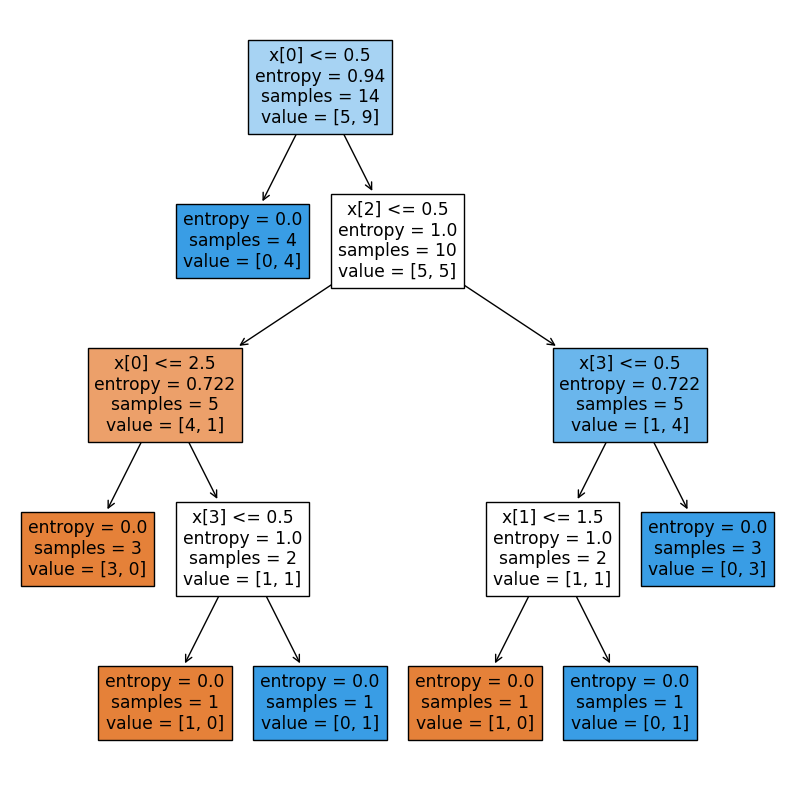

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy') 
X = df.drop(columns=['buys_computer'])
y = df['buys_computer']
clf.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

Training Set Accuracy: 1.00
Test Set Accuracy: 0.41


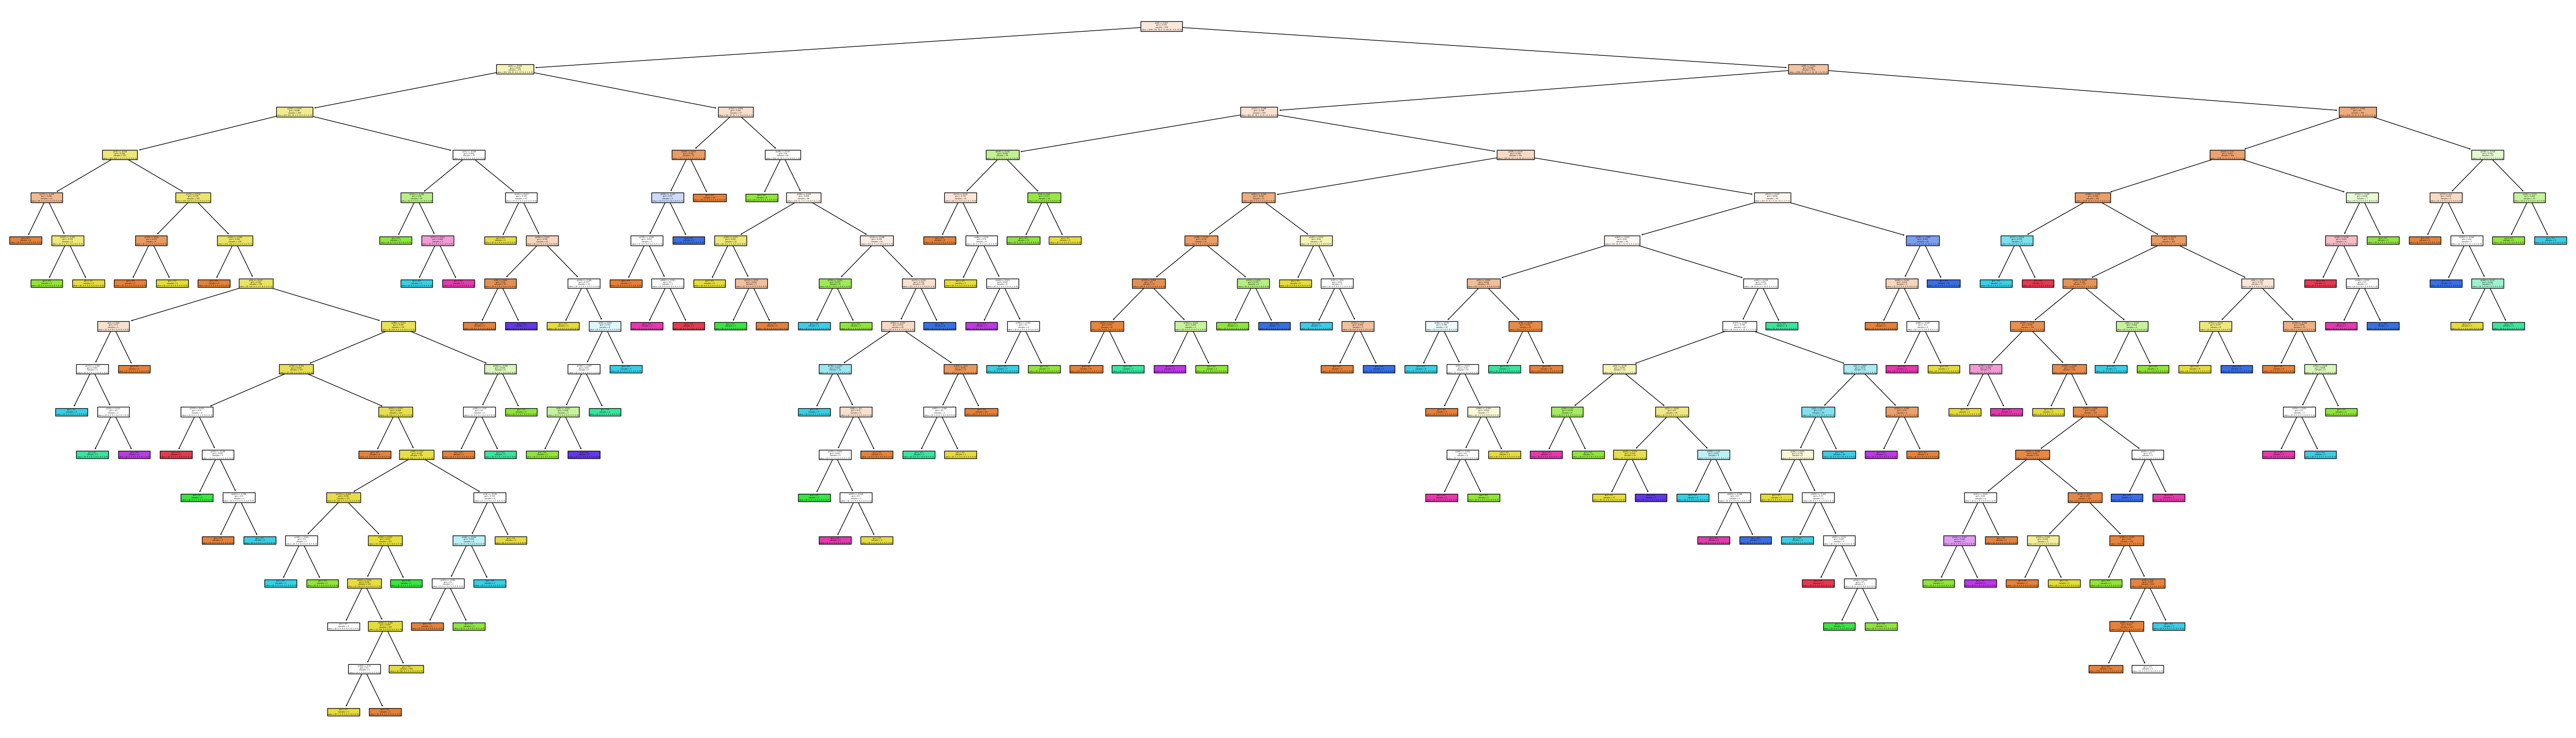

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
data2 = pd.read_csv('output1.csv')
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

training_accuracy = model1.score(X_train, y_train)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

test_accuracy = model1.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model1, filled=True)
plt.show()

Training Set Accuracy (max_depth=5): 0.71
Test Set Accuracy (max_depth=5): 0.44


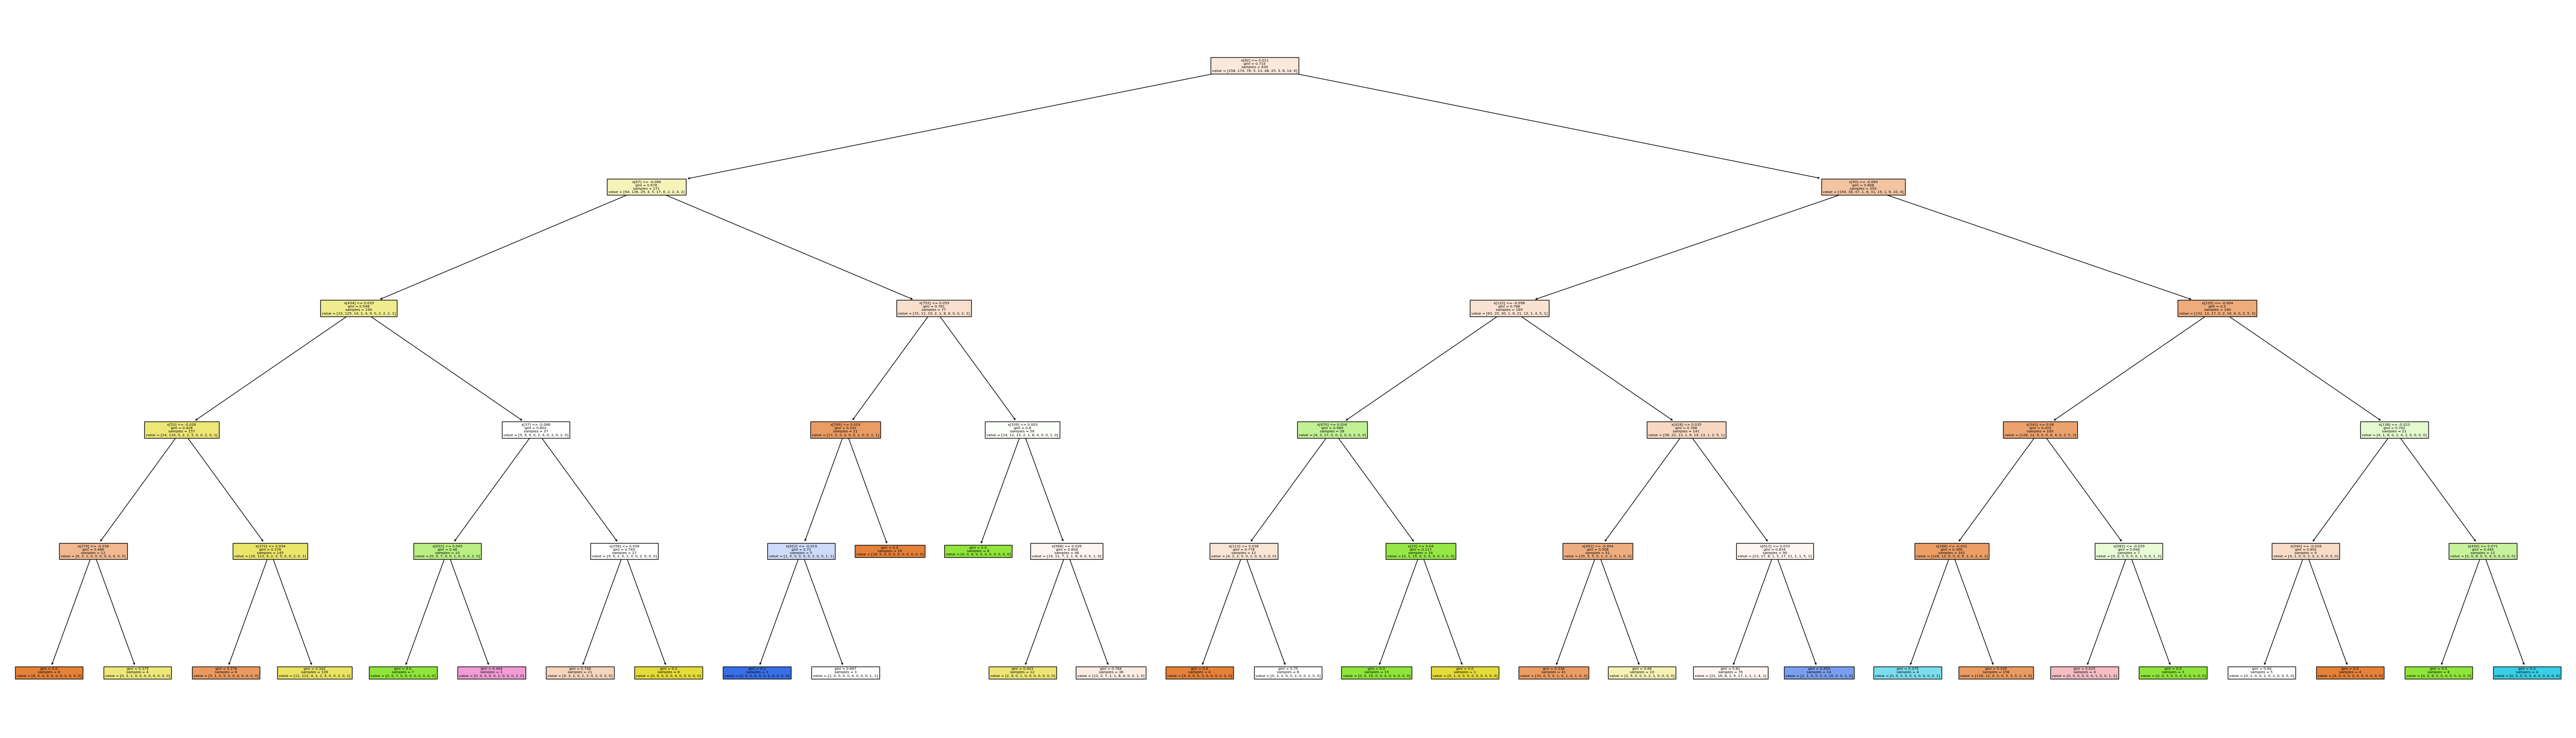

In [33]:
max_depth = 5  
model2 = DecisionTreeClassifier(max_depth=max_depth)
model2.fit(X_train, y_train)

training_accuracy = model2.score(X_train, y_train)
print(f"Training Set Accuracy (max_depth={max_depth}): {training_accuracy:.2f}")

test_accuracy = model2.score(X_test, y_test)
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model2, filled=True)
plt.show()

Training Set Accuracy (Entropy Criterion): 1.00
Test Set Accuracy (Entropy Criterion): 0.39


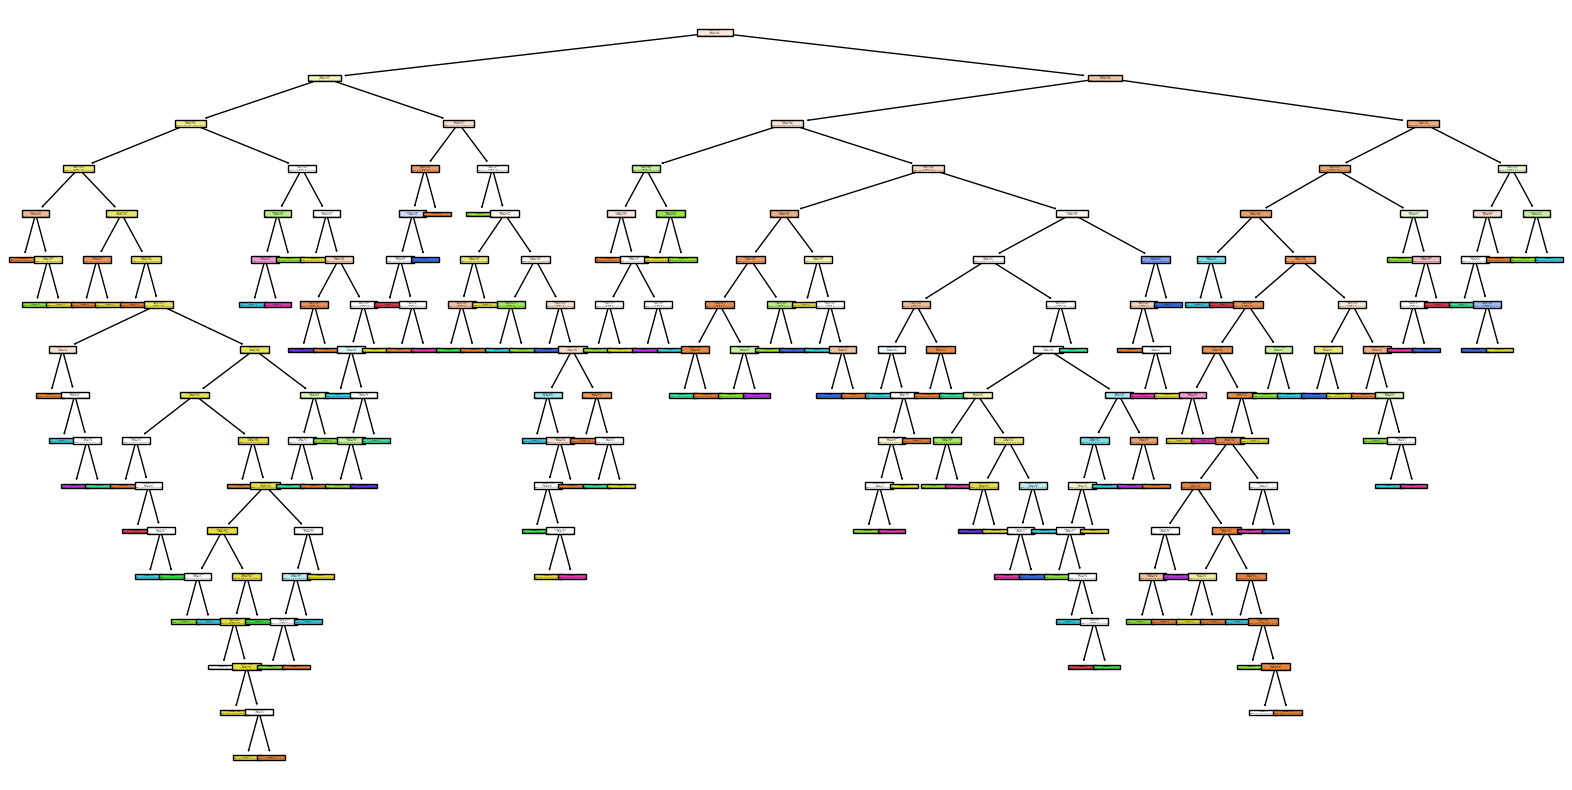

In [34]:
model2 = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy (Entropy Criterion): {training_accuracy:.2f}")

test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create a Random Forest Classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
decision_tree_predictions = model1.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_predictions, average='weighted')

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1_score = f1_score(y_test, random_forest_predictions, average='weighted')

# Compare performance metrics
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-Score: {decision_tree_f1_score:.2f}")

print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-Score: {random_forest_f1_score:.2f}")


Decision Tree Performance Metrics:
Accuracy: 0.41
Precision: 0.42
Recall: 0.41
F1-Score: 0.41

Random Forest Performance Metrics:
Accuracy: 0.59
Precision: 0.52
Recall: 0.59
F1-Score: 0.51


D:\softwares\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\softwares\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
